In [227]:
import numpy as np
import pickle
import pandas as pd
import statistics
from statistics import mean
from scipy import stats
from biosppy.signals import ecg, eda, emg, resp
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Import datasets

In [2]:
#S1 does not exist
with open("./Dataset/S2.pkl", 'rb') as f:
    S2 = pickle.load(f, encoding='latin')
with open("./Dataset/S3.pkl", 'rb') as f:
    S3 = pickle.load(f, encoding='latin')
with open("./Dataset/S4.pkl", 'rb') as f:
    S4 = pickle.load(f, encoding='latin')
with open("./Dataset/S5.pkl", 'rb') as f:
    S5 = pickle.load(f, encoding='latin')
with open("./Dataset/S6.pkl", 'rb') as f:
    S6 = pickle.load(f, encoding='latin')
with open("./Dataset/S7.pkl", 'rb') as f:
    S7 = pickle.load(f, encoding='latin')
with open("./Dataset/S8.pkl", 'rb') as f:
    S8 = pickle.load(f, encoding='latin')
with open("./Dataset/S9.pkl", 'rb') as f:
    S9 = pickle.load(f, encoding='latin')
with open("./Dataset/S10.pkl", 'rb') as f:
    S10 = pickle.load(f, encoding='latin')
with open("./Dataset/S11.pkl", 'rb') as f:
    S11 = pickle.load(f, encoding='latin')    
#S12 does not exist
with open("./Dataset/S13.pkl", 'rb') as f:
    S13 = pickle.load(f, encoding='latin')
with open("./Dataset/S14.pkl", 'rb') as f:
    S14 = pickle.load(f, encoding='latin')
with open("./Dataset/S15.pkl", 'rb') as f:
    S15 = pickle.load(f, encoding='latin')    
with open("./Dataset/S16.pkl", 'rb') as f:
    S16 = pickle.load(f, encoding='latin')
with open("./Dataset/S17.pkl", 'rb') as f:
    S17 = pickle.load(f, encoding='latin')

In [3]:
def to_pd(S):
    lst=S['signal']['chest']['ACC']
    ACC_x=np.asarray([item[0] for item in lst])
    ACC_y=np.asarray([item[1] for item in lst])
    ACC_z=np.asarray([item[2] for item in lst])

    d={'acc_x': ACC_x,
    'acc_y': ACC_y,
    'acc_z': ACC_z,
    'ecg': S['signal']['chest']['ECG'].flatten(),
    'emg': S['signal']['chest']['EMG'].flatten(),
    'eda': S['signal']['chest']['EDA'].flatten(),
    'temp': S['signal']['chest']['Temp'].flatten(),
    'resp': S['signal']['chest']['Resp'].flatten(),
    'label':S['label']}
    Sd=pd.DataFrame(data=d)
    return Sd

In [4]:
S2_d=to_pd(S2)
S3_d=to_pd(S3)
S4_d=to_pd(S4)
S5_d=to_pd(S5)
S6_d=to_pd(S6)
S7_d=to_pd(S7)
S8_d=to_pd(S8)
S9_d=to_pd(S9)
S10_d=to_pd(S10)
S11_d=to_pd(S11)
S13_d=to_pd(S13)
S14_d=to_pd(S14)
S15_d=to_pd(S15)
S16_d=to_pd(S16)
S17_d=to_pd(S17)

# ECG

In [5]:
#Compute ECG for every subject
ECG2 = ecg.ecg(signal=S2_d['ecg'], sampling_rate=700., show=False)
ECG3 = ecg.ecg(signal=S3_d['ecg'], sampling_rate=700., show=False)
ECG4 = ecg.ecg(signal=S4_d['ecg'], sampling_rate=700., show=False)
ECG5 = ecg.ecg(signal=S5_d['ecg'], sampling_rate=700., show=False)
ECG6 = ecg.ecg(signal=S6_d['ecg'], sampling_rate=700., show=False)
ECG7 = ecg.ecg(signal=S7_d['ecg'], sampling_rate=700., show=False)
ECG8 = ecg.ecg(signal=S8_d['ecg'], sampling_rate=700., show=False)
ECG9 = ecg.ecg(signal=S9_d['ecg'], sampling_rate=700., show=False)
ECG10 = ecg.ecg(signal=S10_d['ecg'], sampling_rate=700., show=False)
ECG11 = ecg.ecg(signal=S11_d['ecg'], sampling_rate=700., show=False)
ECG13 = ecg.ecg(signal=S13_d['ecg'], sampling_rate=700., show=False)
ECG14 = ecg.ecg(signal=S14_d['ecg'], sampling_rate=700., show=False)
ECG15 = ecg.ecg(signal=S15_d['ecg'], sampling_rate=700., show=False)
ECG16 = ecg.ecg(signal=S16_d['ecg'], sampling_rate=700., show=False)
ECG17 = ecg.ecg(signal=S17_d['ecg'], sampling_rate=700., show=False)

In [68]:
def create_ECG(ECG,S):
    x=np.round(ECG['heart_rate_ts'], 0)
    x=x.astype(int)
    d={'ts': x,
    'HR': ECG['heart_rate']}
    HR=pd.DataFrame(data=d)
    HR=HR.groupby(['ts']).mean()
    l=list(range(int(S/700)));
    HR=HR.reindex(l)
    HR=HR.interpolate()
    HR=HR.fillna(method='bfill')
    return HR

In [69]:
HR2=create_ECG(ECG2, len(S2_d))
HR3=create_ECG(ECG3, len(S3_d))
HR4=create_ECG(ECG4, len(S4_d))
HR5=create_ECG(ECG5, len(S5_d))
HR6=create_ECG(ECG6, len(S6_d))
HR7=create_ECG(ECG7, len(S7_d))
HR8=create_ECG(ECG8, len(S8_d))
HR9=create_ECG(ECG9, len(S9_d))
HR10=create_ECG(ECG10, len(S10_d))
HR11=create_ECG(ECG11, len(S11_d))
HR13=create_ECG(ECG13, len(S13_d))
HR14=create_ECG(ECG14, len(S14_d))
HR15=create_ECG(ECG15, len(S15_d))
HR16=create_ECG(ECG16, len(S16_d))
HR17=create_ECG(ECG17, len(S17_d))

In [70]:
#Compile heart rate into one dataset
frames = [HR2, HR3, HR4, HR5, HR6, HR7, HR8, HR9, HR10, HR11, HR13, HR14, HR15, HR16, HR17]
HR=pd.concat(frames)
HR=HR.reset_index()
HR=HR.drop(columns='ts')

,HR
0,79.260919
1,79.260919
2,77.573129
3,70.623565
4,66.600045
...,...
86863,72.959963
86864,76.377851
86865,76.201787
86866,76.383674


# EDA

In [9]:
#Compute EDA for every subject
EDA2=eda.eda(signal=S2_d['eda'], sampling_rate=700., show=False)
EDA3=eda.eda(signal=S3_d['eda'], sampling_rate=700., show=False)
EDA4=eda.eda(signal=S4_d['eda'], sampling_rate=700., show=False)
EDA5=eda.eda(signal=S5_d['eda'], sampling_rate=700., show=False)
EDA6=eda.eda(signal=S6_d['eda'], sampling_rate=700., show=False)
EDA7=eda.eda(signal=S7_d['eda'], sampling_rate=700., show=False)
EDA8=eda.eda(signal=S8_d['eda'], sampling_rate=700., show=False)
EDA9=eda.eda(signal=S9_d['eda'], sampling_rate=700., show=False)
EDA10=eda.eda(signal=S10_d['eda'], sampling_rate=700., show=False)
EDA11=eda.eda(signal=S11_d['eda'], sampling_rate=700., show=False)
EDA13=eda.eda(signal=S13_d['eda'], sampling_rate=700., show=False)
EDA14=eda.eda(signal=S14_d['eda'], sampling_rate=700., show=False)
EDA15=eda.eda(signal=S15_d['eda'], sampling_rate=700., show=False)
EDA16=eda.eda(signal=S16_d['eda'], sampling_rate=700., show=False)
EDA17=eda.eda(signal=S17_d['eda'], sampling_rate=700., show=False)

C:\Users\sebba\anaconda3\lib\site-packages\biosppy\signals\eda.py:239: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scrs = np.array(scrs)


In [65]:
def create_EDA(EDA,S):
    x=np.round(EDA['peaks']/700, 0)
    x=x.astype(int)
    EDA_b = np.array([0 if i in [0] else 1 for i in EDA['amplitudes']])
    d={'ts': x,
    'EDA': EDA['amplitudes']}
    ED=pd.DataFrame(data=d)
    ED=ED.groupby(['ts']).mean()
    l=list(range(int(S/700)));
    ED=ED.reindex(l)
    ED=ED.fillna(0)
    EDA_b = np.array([0 if i in [0] else 1 for i in ED['EDA']])
    ED['EDA_b']=EDA_b
    return ED

In [66]:
ED2=create_EDA(EDA2, len(S2_d))
ED3=create_EDA(EDA3, len(S3_d))
ED4=create_EDA(EDA4, len(S4_d))
ED5=create_EDA(EDA5, len(S5_d))
ED6=create_EDA(EDA6, len(S6_d))
ED7=create_EDA(EDA7, len(S7_d))
ED8=create_EDA(EDA8, len(S8_d))
ED9=create_EDA(EDA9, len(S9_d))
ED10=create_EDA(EDA10, len(S10_d))
ED11=create_EDA(EDA11, len(S11_d))
ED13=create_EDA(EDA13, len(S13_d))
ED14=create_EDA(EDA14, len(S14_d))
ED15=create_EDA(EDA15, len(S15_d))
ED16=create_EDA(EDA16, len(S16_d))
ED17=create_EDA(EDA17, len(S17_d))

In [67]:
#Make dataframe with EDA for all subjects
frames = [ED2, ED3, ED4, ED5, ED6, ED7, ED8, ED9, ED10, ED11, ED13, ED14, ED15, ED16, ED17]
ED=pd.concat(frames)
ED=ED.reset_index()
ED=ED.drop(columns='ts')

,EDA,EDA_b
0,0.000000,0
1,0.000000,0
2,0.001267,1
3,0.000000,0
4,0.000000,0
...,...,...
86863,0.000000,0
86864,0.000000,0
86865,0.000000,0
86866,0.000000,0


# EMG


In [13]:
#Compute EMG for every subject
EMG2=emg.emg(signal=S2_d['emg'], sampling_rate=700., show=False)
EMG3=emg.emg(signal=S3_d['emg'], sampling_rate=700., show=False)
EMG4=emg.emg(signal=S4_d['emg'], sampling_rate=700., show=False)
EMG5=emg.emg(signal=S5_d['emg'], sampling_rate=700., show=False)
EMG6=emg.emg(signal=S6_d['emg'], sampling_rate=700., show=False)
EMG7=emg.emg(signal=S7_d['emg'], sampling_rate=700., show=False)
EMG8=emg.emg(signal=S8_d['emg'], sampling_rate=700., show=False)
EMG9=emg.emg(signal=S9_d['emg'], sampling_rate=700., show=False)
EMG10=emg.emg(signal=S10_d['emg'], sampling_rate=700., show=False)
EMG11=emg.emg(signal=S11_d['emg'], sampling_rate=700., show=False)
EMG13=emg.emg(signal=S13_d['emg'], sampling_rate=700., show=False)
EMG14=emg.emg(signal=S14_d['emg'], sampling_rate=700., show=False)
EMG15=emg.emg(signal=S15_d['emg'], sampling_rate=700., show=False)
EMG16=emg.emg(signal=S16_d['emg'], sampling_rate=700., show=False)
EMG17=emg.emg(signal=S17_d['emg'], sampling_rate=700., show=False)

In [62]:
def create_EMG(EMG,S):
    emg=np.round(EMG['onsets']/700)
    emg_onset=np.zeros(int(S/700), dtype='int8')
    for i in range(int(S/700)):
        emg_onset[i]=np.count_nonzero(emg==i)
    d={'EMG': emg_onset}
    EM=pd.DataFrame(data=d)
    EMG_b = np.array([0 if i in [0] else 1 for i in EM['EMG']])
    EM['EMG_b']=EMG_b
    return EM

In [63]:
EM2=create_EMG(EMG2, len(S2_d))
EM3=create_EMG(EMG3, len(S3_d))
EM4=create_EMG(EMG4, len(S4_d))
EM5=create_EMG(EMG5, len(S5_d))
EM6=create_EMG(EMG6, len(S6_d))
EM7=create_EMG(EMG7, len(S7_d))
EM8=create_EMG(EMG8, len(S8_d))
EM9=create_EMG(EMG9, len(S9_d))
EM10=create_EMG(EMG10, len(S10_d))
EM11=create_EMG(EMG11, len(S11_d))
EM13=create_EMG(EMG13, len(S13_d))
EM14=create_EMG(EMG14, len(S14_d))
EM15=create_EMG(EMG15, len(S15_d))
EM16=create_EMG(EMG16, len(S16_d))
EM17=create_EMG(EMG17, len(S17_d))

In [64]:
#All together
frames = [EM2, EM3, EM4, EM5, EM6, EM7, EM8, EM9, EM10, EM11, EM13, EM14, EM15, EM16, EM17]
EM=pd.concat(frames)
EM=EM.reset_index()
EM=EM.drop(columns='index')

,EMG,EMG_b
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
86863,0,0
86864,0,0
86865,0,0
86866,0,0


# RESP

In [17]:
#Compute respiration for every subject
Resp2=resp.resp(signal=S2_d['resp'], sampling_rate=700., show=False)
Resp3=resp.resp(signal=S3_d['resp'], sampling_rate=700., show=False)
Resp4=resp.resp(signal=S4_d['resp'], sampling_rate=700., show=False)
Resp5=resp.resp(signal=S5_d['resp'], sampling_rate=700., show=False)
Resp6=resp.resp(signal=S6_d['resp'], sampling_rate=700., show=False)
Resp7=resp.resp(signal=S7_d['resp'], sampling_rate=700., show=False)
Resp8=resp.resp(signal=S8_d['resp'], sampling_rate=700., show=False)
Resp9=resp.resp(signal=S9_d['resp'], sampling_rate=700., show=False)
Resp10=resp.resp(signal=S10_d['resp'], sampling_rate=700., show=False)
Resp11=resp.resp(signal=S11_d['resp'], sampling_rate=700., show=False)
Resp13=resp.resp(signal=S13_d['resp'], sampling_rate=700., show=False)
Resp14=resp.resp(signal=S14_d['resp'], sampling_rate=700., show=False)
Resp15=resp.resp(signal=S15_d['resp'], sampling_rate=700., show=False)
Resp16=resp.resp(signal=S16_d['resp'], sampling_rate=700., show=False)
Resp17=resp.resp(signal=S17_d['resp'], sampling_rate=700., show=False)

In [56]:
def create_Resp(Resp,S):
    x=np.round(Resp['resp_rate_ts'], 0)
    x=x.astype(int)
    d={'ts': x,
    'Resp': Resp['resp_rate']}
    RS=pd.DataFrame(data=d)
    RS=RS.groupby(['ts']).mean()
    l=list(range(int(S/700)));
    RS=RS.reindex(l)
    RS=RS.fillna(0)
    RS_b = np.array([0 if i in [0] else 1 for i in RS['Resp']])
    RS['Resp_b']=RS_b
    return RS

In [57]:
RS2=create_Resp(Resp2, len(S2_d))
RS3=create_Resp(Resp3, len(S3_d))
RS4=create_Resp(Resp4, len(S4_d))
RS5=create_Resp(Resp5, len(S5_d))
RS6=create_Resp(Resp6, len(S6_d))
RS7=create_Resp(Resp7, len(S7_d))
RS8=create_Resp(Resp8, len(S8_d))
RS9=create_Resp(Resp9, len(S9_d))
RS10=create_Resp(Resp10, len(S10_d))
RS11=create_Resp(Resp11, len(S11_d))
RS13=create_Resp(Resp13, len(S13_d))
RS14=create_Resp(Resp14, len(S14_d))
RS15=create_Resp(Resp15, len(S15_d))
RS16=create_Resp(Resp16, len(S16_d))
RS17=create_Resp(Resp17, len(S17_d))

In [58]:
#All together
frames = [RS2, RS3, RS4, RS5, RS6, RS7, RS8, RS9, RS10, RS11, RS13, RS14, RS15, RS16, RS17]
RS=pd.concat(frames)
RS=RS.reset_index()
RS=RS.drop(columns='ts')

,Resp,Resp_b
0,0.000000,0
1,0.000000,0
2,0.000000,0
3,0.000000,0
4,0.000000,0
...,...,...
86863,0.000000,0
86864,0.185694,1
86865,0.000000,0
86866,0.000000,0


# Temp

In [34]:
#Divide data to seconds
def divide_chunks(l, n):
    for i in range(0, len(l), n): 
        yield l[i:i + n]

#create temperature dataframe
def create_T(S):
    x = list(divide_chunks(S['temp'], 700))
    mean=np.zeros(int(len(S)/700))
    std=np.zeros(int(len(S)/700))
    for i in range(int(len(S)/700)):
        mean[i]=np.mean(x[i])
        std[i]=np.std(x[i])
    d={'mean_T': mean,
        'std_T': std}
    T=pd.DataFrame(data=d)
    return T

In [36]:
T2=create_T(S2_d)
T3=create_T(S3_d)
T4=create_T(S4_d)
T5=create_T(S5_d)
T6=create_T(S6_d)
T7=create_T(S7_d)
T8=create_T(S8_d)
T9=create_T(S9_d)
T10=create_T(S10_d)
T11=create_T(S11_d)
T13=create_T(S13_d)
T14=create_T(S14_d)
T15=create_T(S15_d)
T16=create_T(S16_d)
T17=create_T(S17_d)

In [37]:
#All together
frames = [T2, T3, T4, T5, T6, T7, T8, T9, T10, T11, T13, T14, T15, T16, T17]
T=pd.concat(frames)
T=T.reset_index()
T=T.drop(columns='index')

,mean_T,std_T
0,30.123638,0.023665
1,30.104570,0.018506
2,30.093279,0.019504
3,30.087336,0.019649
4,30.088646,0.024220
...,...,...
86863,33.876034,0.022401
86864,33.877449,0.022808
86865,33.870209,0.023566
86866,33.864574,0.022010


# ACC

In [124]:
#Compile acceleration in every axis and put it into dataframe
def create_ACC(S):
    x = list(divide_chunks(S['acc_x'], 700))
    y = list(divide_chunks(S['acc_y'], 700))
    z = list(divide_chunks(S['acc_z'], 700))
    mean_x=np.zeros(int(len(S)/700))
    mean_y=np.zeros(int(len(S)/700))
    mean_z=np.zeros(int(len(S)/700))
    std_x=np.zeros(int(len(S)/700))
    std_y=np.zeros(int(len(S)/700))
    std_z=np.zeros(int(len(S)/700))
    for i in range(int(len(S)/700)):
        mean_x[i]=np.mean(x[i])
        mean_y[i]=np.mean(y[i])
        mean_z[i]=np.mean(z[i])
        std_x[i]=np.std(x[i])
        std_y[i]=np.std(y[i])
        std_z[i]=np.std(z[i])
    d={'mean_x': mean_x,
       'mean_y': mean_y,
       'mean_z': mean_z,
       'std_x': std_x,
       'std_y': std_y,
        'std_z': std_z}
    ACC=pd.DataFrame(data=d)
    return ACC

In [125]:
ACC2=create_ACC(S2_d)
ACC3=create_ACC(S3_d)
ACC4=create_ACC(S4_d)
ACC5=create_ACC(S5_d)
ACC6=create_ACC(S6_d)
ACC7=create_ACC(S7_d)
ACC8=create_ACC(S8_d)
ACC9=create_ACC(S9_d)
ACC10=create_ACC(S10_d)
ACC11=create_ACC(S11_d)
ACC13=create_ACC(S13_d)
ACC14=create_ACC(S14_d)
ACC15=create_ACC(S15_d)
ACC16=create_ACC(S16_d)
ACC17=create_ACC(S17_d)

In [280]:
#All together
frames = [ACC2, ACC3, ACC4, ACC5, ACC6, ACC7, ACC8, ACC9, ACC10, ACC11, ACC13, ACC14, ACC15, ACC16, ACC17]
ACC=pd.concat(frames)
ACC=ACC.reset_index()
ACC=ACC.drop(columns='index')

,mean_x,mean_y,mean_z,std_x,std_y,std_z
0,0.863323,-0.126384,-0.316458,0.053275,0.045083,0.094101
1,0.863881,-0.128864,-0.315161,0.062140,0.055675,0.104473
2,0.864248,-0.126402,-0.315757,0.003689,0.006456,0.009927
3,0.864269,-0.128752,-0.316617,0.005210,0.003377,0.009735
4,0.866055,-0.127183,-0.311079,0.004215,0.003604,0.009020
...,...,...,...,...,...,...
86863,0.905522,-0.033974,-0.163737,0.007384,0.018322,0.010462
86864,0.905789,-0.038146,-0.152659,0.007065,0.011661,0.011335
86865,0.907415,-0.042421,-0.154039,0.003589,0.004938,0.008022
86866,0.901406,-0.044165,-0.183767,0.003613,0.003077,0.010128


# LABEL

In [75]:
#Label for every second
def create_lab(S):
    x = list(divide_chunks(S['label'], 700))
    lab=np.zeros(int(len(S)/700))
    for i in range(int(len(S)/700)):
        a=stats.mode(x[i])
        lab[i]=int(a[0])
    d={'label': lab}
    LAB=pd.DataFrame(data=d)
    return LAB

In [76]:
LAB2=create_lab(S2_d)
LAB3=create_lab(S3_d)
LAB4=create_lab(S4_d)
LAB5=create_lab(S5_d)
LAB6=create_lab(S6_d)
LAB7=create_lab(S7_d)
LAB8=create_lab(S8_d)
LAB9=create_lab(S9_d)
LAB10=create_lab(S10_d)
LAB11=create_lab(S11_d)
LAB13=create_lab(S13_d)
LAB14=create_lab(S14_d)
LAB15=create_lab(S15_d)
LAB16=create_lab(S16_d)
LAB17=create_lab(S17_d)

In [283]:
#All together
frames = [LAB2, LAB3, LAB4, LAB5, LAB6, LAB7, LAB8, LAB9, LAB10, LAB11, LAB13, LAB14, LAB15, LAB16, LAB17]
LAB=pd.concat(frames)
LAB=LAB.reset_index()
LAB=LAB.drop(columns='index')

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
6074,0.0
6075,0.0
6076,0.0
6077,0.0


# ALL TOGETHER

In [305]:
#Add all features into one dataframe
S=pd.merge(HR, ED, left_index=True, right_index=True)
S=pd.merge(S, EM, left_index=True, right_index=True)
S=pd.merge(S, RS, left_index=True, right_index=True)
S=pd.merge(S, T, left_index=True, right_index=True)
S=pd.merge(S, ACC, left_index=True, right_index=True)
S=pd.merge(S, LAB, left_index=True, right_index=True)

In [307]:
#Clear the unused labels to train the model
S_f=S[S['label']!=0]
S_f=S_f[S_f['label']!=5]
S_f=S_f[S_f['label']!=6]
S_f=S_f[S_f['label']!=7]

#Get rid of outliers
z_scores=stats.zscore(S_f)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4).all(axis=1)
SS = S_f[filtered_entries]

In [322]:
#Dataframe after ablation study
SS_ab=SS.drop(columns=['std_T', 'std_y', 'std_z'])

# Train and evaluate model

In [318]:
#Split into train and test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(SS.drop('label',axis=1),SS['label'], test_size=0.30, 
                                                    random_state=101)

In [324]:
#Logistic regressin
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=100000, C=1)
logmodel.fit(xtrain,ytrain)
y_pred = logmodel.predict(xtest)
y_predtrain=logmodel.predict(xtrain)
print("Train:",accuracy_score(ytrain, y_predtrain))
print("Test:",accuracy_score(ytest, y_pred))

Train: 0.9582059123343527
Test: 0.9643705463182898


In [329]:
#K-nearest
k=1
neigh=KNeighborsClassifier(n_neighbors=k)
neigh.fit(xtrain, ytrain)
ypred=neigh.predict(xtest)
y_predtrain=neigh.predict(xtrain)
print("Train:",accuracy_score(ytrain, y_predtrain))
print("Test:",accuracy_score(ytest, ypred))

Train: 1.0
Test: 0.9726840855106889


In [330]:
#Decision tree
from sklearn import tree
leaf=tree.DecisionTreeClassifier()
leaf.fit(xtrain, ytrain)
ypred=leaf.predict(xtest)
y_predtrain=leaf.predict(xtrain)
print("Train:",accuracy_score(ytrain, y_predtrain))
print("Test:",accuracy_score(ytest, ypred))

Train: 1.0
Test: 1.0


In [331]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(xtrain, ytrain)
ypred=clf.predict(xtest)
y_predtrain=clf.predict(xtrain)
print("Train:",accuracy_score(ytrain, y_predtrain))
print("Test:",accuracy_score(ytest, ypred))

Train: 1.0
Test: 1.0


In [332]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
boost=AdaBoostClassifier(n_estimators=100)
boost.fit(xtrain,ytrain)
ypred=boost.predict(xtest)
y_predtrain=boost.predict(xtrain)
print("Train:",accuracy_score(ytrain, y_predtrain))
print("Test:",accuracy_score(ytest, ypred))

Train: 0.5326197757390418
Test: 0.5391923990498813


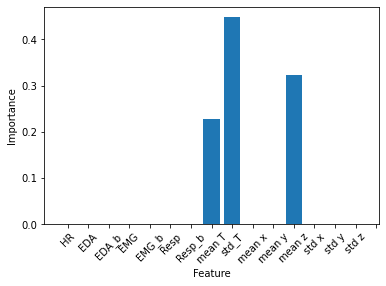

In [321]:
#PLot importance of features
imp=leaf.feature_importances_
pyplot.bar([x for x in range(len(imp))], imp)
xlabel=['HR', 'EDA', 'EDA_b', 'EMG','EMG_b', 'Resp','Resp_b', 'mean T', 'std_T', 'mean x', 'mean y', 'mean z', 'std x', 'std y', 'std z']
pyplot.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15], xlabel, rotation=45)
pyplot.ylabel('Importance')
pyplot.xlabel('Feature')
pyplot.savefig('Importance.png')
pyplot.show()


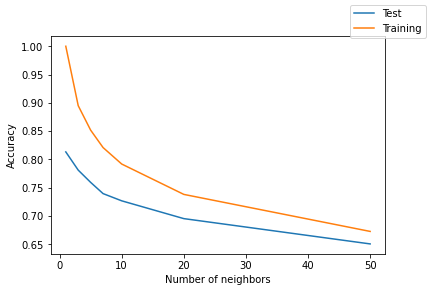

In [239]:
#Neigh
alphas=[1,3,5,7,10, 20,50]
acc=np.zeros(len(alphas))
acc_t=np.zeros(len(alphas))
for i in range (len(alphas)):
    neigh = KNeighborsClassifier(n_neighbors=alphas[i])
    neigh.fit(xtrain, ytrain)
    ypred=neigh.predict(xtest)
    acc[i]=accuracy_score(ytest, ypred)
    acc_t[i]=accuracy_score(ytrain, neigh.predict(xtrain))
fig, ax1 = plt.subplots()
plt.plot(alphas, acc)
ax1.set_xlabel('Number of neighbors')
ax1.set_ylabel('Accuracy')
plt.plot(alphas, acc_t)
fig.legend(["Test", "Training"])

# EDA

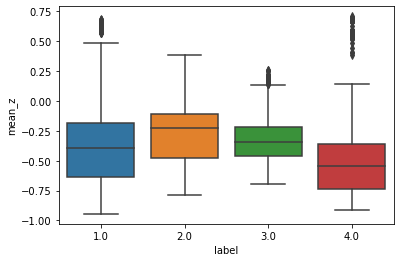

In [134]:
import seaborn as sns
#Change y to other feature to obtain boxplot
sns.boxplot( x = 'label', y = 'mean_z', data = S_f)
#plt.ylim([0,0.25])
plt.savefig('ALL_zm.png')

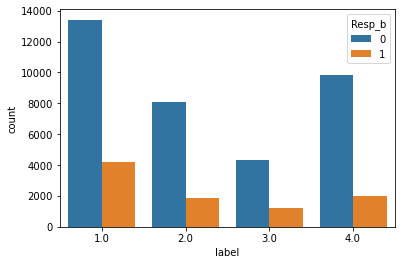

In [114]:
#Change hue to other binary feature to obtain bar chart
sns.countplot(x = 'label', hue = 'Resp_b', data = S_f)
plt.savefig('ALL_Resp.png')

In [220]:
#Spearman coefficient. Change X and Y to compare other features
X=SS['std_y']
Y=SS['std_z']
result_sp=spearmanr(X,Y)
print(result_sp)

(0.6946454351298932, 0.0)
SpearmanrResult(correlation=0.7433921857951258, pvalue=0.0)
